In [1]:
# Dependencies and Setup
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weather_dataframe.csv"

clean_city_df = pd.read_csv(output_data_file)

In [2]:
clean_city_df = clean_city_df.drop('Unnamed: 0', axis=1)

In [3]:
clean_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olafsvik,64.89,-23.71,42.48,86,100,14.25,IS,1603232099
1,auki,-8.77,160.70,82.26,78,100,4.68,SB,1603232099
2,cape town,-36.41,-71.90,75.20,29,10,9.17,CL,1603232099
3,port alfred,-7.03,29.76,76.37,64,58,7.38,CD,1603232100
4,englewood,39.65,-104.99,69.01,27,75,10.29,US,1603232076
...,...,...,...,...,...,...,...,...,...
545,boyolangu,62.88,152.43,15.22,94,18,2.91,ID,1603232217
546,fort pierce,-8.12,111.89,76.89,86,87,2.17,NL,1603231998
547,ponta delgada,52.65,6.39,57.00,93,100,4.00,PT,1603232217
548,tambura,38.73,-28.27,59.99,73,78,25.99,SS,1603232217


# Plotting the data

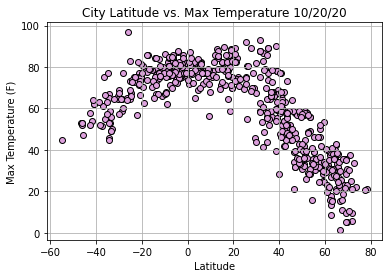

In [21]:
#Latitude vs temperature plot
latitude = clean_city_df['Lat']
temp = clean_city_df['Max Temp']

plt.scatter(latitude, temp, c='plum', edgecolors='black')
plt.grid(b=True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature 10/20/20")

plt.savefig('lat_temp.png')

The above plot shows city latitudes vs max temperatures (in Fahrenheit) for 10/20/20. The above code plots the
latitude values on the x-axis and the max temperatures on the y-axis. This scatter plot shows the relationship
between the location of a city and the max temperatures it experiences. This plot shows that as latitude increases,
max temperature decreases.

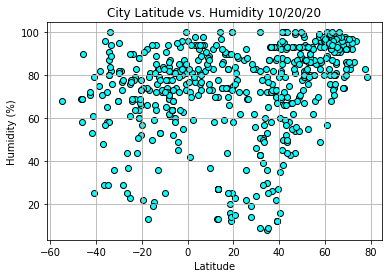

In [22]:
#Latitude vs humidity plot
latitude = clean_city_df['Lat']
humidity_c = clean_city_df['Humidity']

plt.scatter(latitude, humidity_c, c='cyan', edgecolors='black')
plt.grid(b=True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 10/20/20")

plt.savefig('lat_humid.png')

The above plot shows city latitudes vs humidity (in %) for 10/20/20. The above code plots the latitude values on the x-axis and the humidity % on the y-axis. This scatter plot shows the relationship between the location of a city and the humidity it experiences. This plot shows that latitude and humidity do not have a linear relationship, however most cities regardless of the latitude have a humidity % of above 40%.

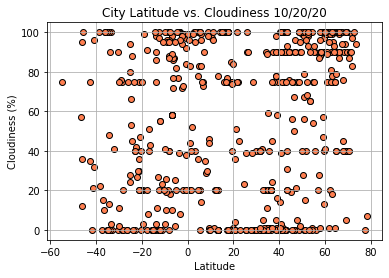

In [23]:
#Latitude vs cloudiness plot
latitude = clean_city_df['Lat']
cloudiness_c = clean_city_df['Cloudiness']

plt.scatter(latitude, cloudiness_c, c='coral', edgecolors='black')
plt.grid(b=True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 10/20/20")

plt.savefig('lat_cloudiness.png')

The above plot shows city latitudes vs cloudiness (in %) for 10/20/20. The above code plots the latitude values on the x-axis and the cloudiness % on the y-axis. This scatter plot shows the relationship between the location of a city and the amount of cloudiness it experiences. This plot shows that there is not a linear relationship between latitude and cloudiness. Cities at a latitude of -40 can have cloudiness % ranging from 0 to 100, and the same goes for cities with a latitude of 20, 40, 60, etc. From this plot, you can infer that there is not a correlation between latitude of a city and cloudiness %.

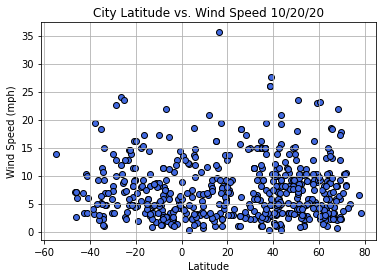

In [24]:
#Latitude vs wind speed plot
latitude = clean_city_df['Lat']
wind_c = clean_city_df['Wind Speed']

plt.scatter(latitude, wind_c, c='royalblue', edgecolors='black')
plt.grid(b=True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed 10/20/20")

plt.savefig('lat_windspeed.png')

The above plot shows city latitudes vs wind speed (in mph) for 10/20/20. The above code plots the latitude values on the x-axis and the wind speed on the y-axis. This scatter plot shows the relationship between the location of a city and the wind speeds. This plot shows that wind speed generally does not exceed 20 mph, regardless of the latitude.

## Max Temp (F) vs. Latitude Linear Regression

The r-value is: -0.862150450305805


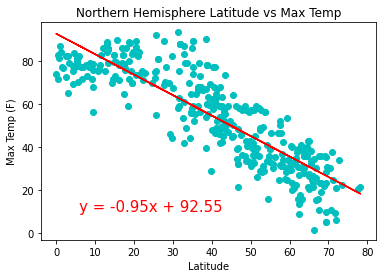

In [25]:
#Northern Hemisphere Latitude vs Temp linear regression
north_h = clean_city_df.loc[clean_city_df['Lat'] >= 0, 'Lat']

north_temp = clean_city_df.loc[clean_city_df['Lat'] >= 0, 'Max Temp']

x_values = north_h
y_values = north_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#Regression formula
regress_values = x_values * slope + intercept
#Equation of the line to print on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values, c='c')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs Max Temp")
print(f"The r-value is: {rvalue}")

plt.savefig('northlat_temp.png')

The r-value is: 0.7574391106138404


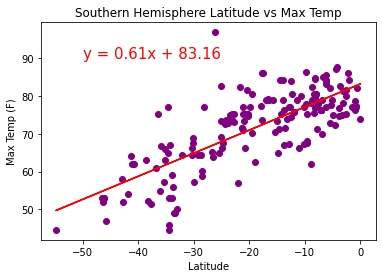

In [26]:
#Southern hemisphere latitude vs temp linear regression
south_h = clean_city_df.loc[clean_city_df['Lat'] <= 0, 'Lat']

south_temp = clean_city_df.loc[clean_city_df['Lat'] <= 0, 'Max Temp']

x_values = south_h
y_values = south_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#Regression formula
regress_values = x_values * slope + intercept
#Equation of the line to print on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values, c='purple')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs Max Temp")
print(f"The r-value is: {rvalue}")

plt.savefig('southlat_temp.png')

The linear regressions for northern hemisphere and southern hemisphere cloudiness vs latitude show a different relationship depending on the hemisphere. In the northern hemisphere, there is a strong negative correlation (r-value = -0.86) between temperature and latitude, where as the latitude increases the max temperature decreases. In the southern hemisphere, the opposite relationship is observed. There is a strong positive correlation (r-value = 0.75) in the southern hemisphere, where as latitude increases max temperature increases.

## Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3062020527285163


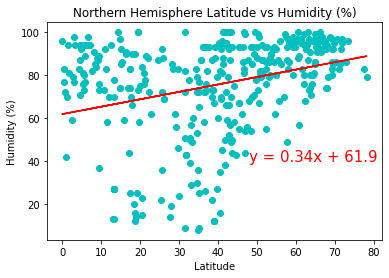

In [27]:
#Northern hemisphere latitude vs humidity linear regression
#Go back and try to make these into functions that automatically calculate
north_h = clean_city_df.loc[clean_city_df['Lat'] >= 0, 'Lat']

north_humid = clean_city_df.loc[clean_city_df['Lat'] >= 0, 'Humidity']

x_values = north_h
y_values = north_humid

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#Regression formula
regress_values = x_values * slope + intercept
#Equation of the line to print on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values, c='c')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(48,40),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs Humidity (%)")
print(f"The r-value is: {rvalue}")

plt.savefig('nothlat_humid.png')

The r-value is: 0.11485765876009474


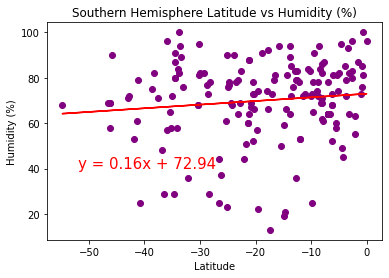

In [28]:
#Southern hemisphere latitude vs humidity
south_humid = clean_city_df.loc[clean_city_df['Lat'] <= 0, 'Humidity']

x_values = south_h
y_values = south_humid

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#Regression formula
regress_values = x_values * slope + intercept
#Equation of the line to print on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values, c='purple')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-52,40),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs Humidity (%)")
print(f"The r-value is: {rvalue}")

plt.savefig('southlat_humid.png')

The linear regression for humidity % vs latitude shows that in the northern hemisphere, a weak positive correlation (r value = 0.306) exists where as latitude increases, humidity % increases. For the southern hemisphere, no relationship exists between latitude and humidity %.

## Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.237329214080402


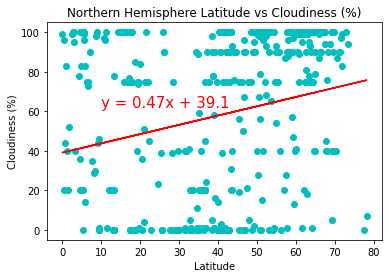

In [29]:
#Northern hem cloudiness vs latitude
north_cloud = clean_city_df.loc[clean_city_df['Lat'] >= 0, 'Cloudiness']

x_values = north_h
y_values = north_cloud

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#Regression formula
regress_values = x_values * slope + intercept
#Equation of the line to print on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values, c='c')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(10,62),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs Cloudiness (%)")
print(f"The r-value is: {rvalue}")

plt.savefig('nothlat_cloud.png')

The r-value is: 0.19609506138871483


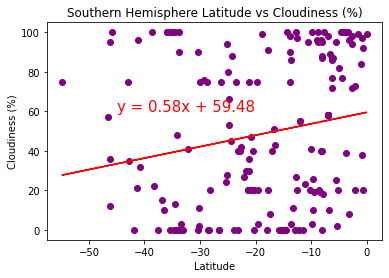

In [30]:
#Southern hem cloudiness vs latitude
south_cloud = clean_city_df.loc[clean_city_df['Lat'] <= 0, 'Cloudiness']

x_values = south_h
y_values = south_cloud

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#Regression formula
regress_values = x_values * slope + intercept
#Equation of the line to print on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values, c='purple')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-45,60),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs Cloudiness (%)")
print(f"The r-value is: {rvalue}")

plt.savefig('southlat_cloud.png')

The linear regressions for cloudiness vs latitude in the northern vs southern hemisphere show that for both hemispheres, no statistically significant relationship exists between latitude and cloudiness. Even though there is no statistically significant correlation, the regression shows that for the northern and southern hemisphere, the equation of the line and r value are positive.

## Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.012445737725417948


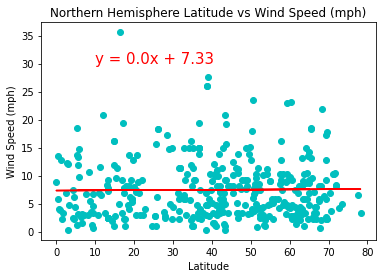

In [31]:
#Northern hem wind speed vs latitude
north_wind = clean_city_df.loc[clean_city_df['Lat'] >= 0, 'Wind Speed']

x_values = north_h
y_values = north_wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#Regression formula
regress_values = x_values * slope + intercept
#Equation of the line to print on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values, c='c')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs Wind Speed (mph)")
print(f"The r-value is: {rvalue}")

plt.savefig('northlat_wind.png')

The r-value is: -0.14982737352950173


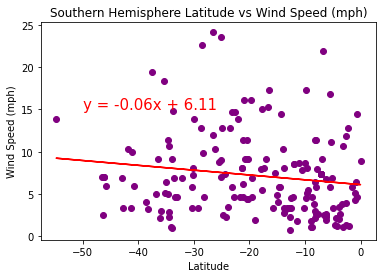

In [32]:
#Southern hem wind speed vs latitude
south_wind = clean_city_df.loc[clean_city_df['Lat'] <= 0, 'Wind Speed']

x_values = south_h
y_values = south_wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#Regression formula
regress_values = x_values * slope + intercept
#Equation of the line to print on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values, c='purple')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs Wind Speed (mph)")
print(f"The r-value is: {rvalue}")

plt.savefig('southlat_wind.png')

The linear regression for latitude vs wind speed in the southern vs northen hemisphere shows that for both hemispheres, no statistically significant relationship exists. The regression does show a slight difference between the two, where the northern hemisphere line/r-value is positive, and the southern hemisphere line/r-value is negative.